In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.colors as cols
import numpy as np
from hb_sub import *
import glob

fs=glob.glob("dsrt/newSubset/ku*dsrt*")
count=0
count_s=0
pia1=[]
pia2=[]
zKuL=[]
zKaL=[]
cfadZ=np.zeros((50,47),float)
cfadZKa=np.zeros((50,47),float)
sfcPrecipL=[]
srtPIAL=[]
for f in sorted(fs):
    fh=Dataset(f)
    sfcPrecip=fh["sfcPrecip"][:]
    drelFact=fh["drelFact"][:]
    relFact=fh["relFact"][:]
    dsrtPIA=fh["dsrtPIA"][:]
    srtPIA=fh["srtPIA"][:]
    bzd=fh["bzd"][:]
    bcf=fh["bcf"][:]
    zKu=fh["zKu"][:]
    zKa=fh["zKa"][:]
    for i,relF in enumerate(drelFact):
        if bzd[i]+30>bcf[i] or bzd[i]>160 or bcf[i]<168:
            continue
        if sfcPrecip[i]<20 and ((relF==1) or (relF==2)):
            count+=1
            zKuL.append(zKu[i,bzd[i]+16-80:bzd[i]+30:2])
            zKaL.append(zKa[i,bzd[i]+16-80:bzd[i]+30:2])
            sfcPrecipL.append(sfcPrecip[i])
            zKu1= zKuL[-1]
            zKa1= zKaL[-1]
            srtPIAL.append(dsrtPIA[i,0])
            for k in range(47):
                if zKu1[k]>10 and zKa1[k]>10:
                    if k>1 and k<46:
                        if zKu1[k-1]<10 or zKu1[k+1]<10:
                            continue
                    iz=int(zKuL[-1][k])
                    if iz<50:
                        cfadZ[iz,k]+=1
                if zKa1[k]>12 and zKu1[k]>10:
                    iz=int(zKaL[-1][k])
                    if iz<50:
                        cfadZKa[iz,k]+=1
            if relFact[i]==1 or relFact[i]==2:
                count_s+=1
                pia1.append(dsrtPIA[i,0])                
                pia2.append(srtPIA[i])


 Random Seeds :     85786433    85786470
  -330181176
           8
imu:     1  mu:    -2.0000  mu_tab:    -2.0000
   10.6499996    
   18.7000008    
   23.7999992    
   35.5000000    
   89.0000000    
   165.500000    
   183.300003    
imu:     2  mu:    -1.0000  mu_tab:    -1.0000
   10.6499996    
   18.7000008    
   23.7999992    
   35.5000000    
   89.0000000    
   165.500000    
   183.300003    
imu:     3  mu:     0.0000  mu_tab:     0.0000
   10.6499996    
   18.7000008    
   23.7999992    
   35.5000000    
   89.0000000    
   165.500000    
   183.300003    
imu:     4  mu:     1.0000  mu_tab:     1.0000
   10.6499996    
   18.7000008    
   23.7999992    
   35.5000000    
   89.0000000    
   165.500000    
   183.300003    
imu:     5  mu:     2.0000  mu_tab:     2.0000
   10.6499996    
   18.7000008    
   23.7999992    
   35.5000000    
   89.0000000    
   165.500000    
   183.300003    
   10.0000000       19.0000000       22.0000000       37.0000000    

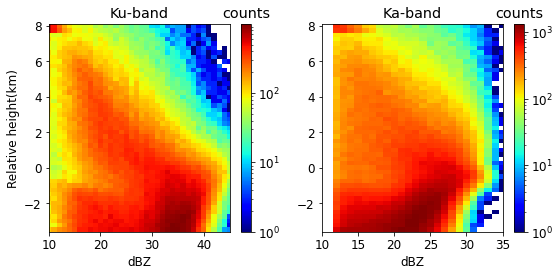

In [12]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
plt.figure(figsize=(8,4))
plt.subplot(121)
c=plt.pcolormesh(range(50),32*0.25-np.arange(47)*0.25,cfadZ.T,cmap='jet',norm=cols.LogNorm())
plt.xlim(10,45)
plt.xlabel("dBZ")
plt.ylabel("Relative height(km)")
plt.title("Ku-band")
cb=plt.colorbar(c)
cb.ax.set_title("counts")
plt.subplot(122)
c=plt.pcolormesh(range(50),32*0.25-np.arange(47)*0.25,cfadZKa.T,cmap='jet',norm=cols.LogNorm())
plt.xlim(10,35)
plt.xlabel("dBZ")
plt.title("Ka-band")
cb=plt.colorbar(c)
cb.ax.set_title("counts")
plt.tight_layout()
plt.savefig("cfads.png")